In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cust = pd.read_csv('EDA/Datasets/Cust_Demograph_cleaned.csv', index_col = 'customer_id')
df_address = pd.read_csv('EDA/Datasets/Cust_Address_cleaned.csv', index_col = 'customer_id')
df_transactions = pd.read_csv('EDA/Datasets/Transactions_cleaned.csv', index_col = 'customer_id')

In [4]:
df_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,0,1,11.000000,69
2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,0,1,16.000000,42
3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,0,1,15.000000,69
4,Talbot,Andrioni,Male,33,Senior Editor,IT,Mass Customer,0,0,7.000000,61
5,Sheila-kathryn,Calton,Female,56,Senior Editor,IT,Affluent Customer,0,1,8.000000,46
...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,0,0,19.000000,48
3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,0,1,1.000000,22
3998,Sarene,Woolley,Unknown,60,Assistant Manager,IT,High Net Worth,0,0,10.657041,45


In [5]:
df_address

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


In [6]:
df_transactions

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,
2950,1,2,2017-02-25,0,1,Solex,Standard,medium,medium,71.49,53.62,41245
3120,2,3,2017-05-21,1,1,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
402,3,37,2017-10-16,0,1,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3135,4,88,2017-08-31,0,1,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
787,5,78,2017-10-01,1,1,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,19996,51,2017-06-24,1,1,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
127,19997,41,2017-11-09,1,1,Solex,Road,medium,medium,416.98,312.74,35560
2284,19998,87,2017-04-14,1,1,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410


In [7]:
cust_info = df_cust.merge(df_address, on='customer_id', how='left')

In [8]:
cust_info

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,0,1,11.000000,69,060 Morning Avenue,2016.0,NSW,Australia,10.0
2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,0,1,16.000000,42,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,0,1,15.000000,69,NaN,NaN,NaN,NaN,NaN
4,Talbot,Andrioni,Male,33,Senior Editor,IT,Mass Customer,0,0,7.000000,61,0 Holy Cross Court,4211.0,QLD,Australia,9.0
5,Sheila-kathryn,Calton,Female,56,Senior Editor,IT,Affluent Customer,0,1,8.000000,46,17979 Del Mar Point,2448.0,NSW,Australia,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,0,0,19.000000,48,0 Transport Center,3977.0,VIC,Australia,6.0
3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,0,1,1.000000,22,4 Dovetail Crossing,2350.0,NSW,Australia,2.0
3998,Sarene,Woolley,Unknown,60,Assistant Manager,IT,High Net Worth,0,0,10.657041,45,736 Roxbury Junction,2540.0,NSW,Australia,6.0


In [9]:
df_merged = cust_info.merge(df_transactions, on='customer_id', how='right')

In [10]:
df_merged

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,,,,,,,,,,
2950,Kristos,Anthony,Male,19.0,Software Engineer I,Financial Services,Mass Customer,0.0,1.0,10.0,...,2017-02-25,0,1,Solex,Standard,medium,medium,71.49,53.62,41245
3120,Lauree,O'Donnell,Female,89.0,Clinical Specialist,Health,Mass Customer,0.0,1.0,10.0,...,2017-05-21,1,1,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
402,Berne,Donegan,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,0.0,0.0,22.0,...,2017-10-16,0,1,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3135,Titus,Worsall,Male,83.0,Staff Scientist,Financial Services,Mass Customer,0.0,0.0,16.0,...,2017-08-31,0,1,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
787,Norma,Batrim,Female,29.0,Social Worker,Retail,Affluent Customer,0.0,1.0,2.0,...,2017-10-01,1,1,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Matthiew,Ferreras,Male,1.0,Help Desk Operator,Manufacturing,Mass Customer,0.0,1.0,7.0,...,2017-06-24,1,1,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
127,Merrili,Whitear,Female,81.0,Compensation Analyst,Financial Services,Mass Customer,0.0,0.0,19.0,...,2017-11-09,1,1,Solex,Road,medium,medium,416.98,312.74,35560
2284,Ola,Lenoir,Female,83.0,Staff Accountant IV,Telecommunications,High Net Worth,0.0,0.0,14.0,...,2017-04-14,1,1,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410


In [11]:
df = df_merged.sort_values(by = ['customer_id'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 1 to 5034
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           19800 non-null  object 
 1   last_name                            19800 non-null  object 
 2   gender                               19800 non-null  object 
 3   past_3_years_bike_related_purchases  19800 non-null  float64
 4   job_title                            19800 non-null  object 
 5   job_industry_category                19800 non-null  object 
 6   wealth_segment                       19800 non-null  object 
 7   deceased_indicator                   19800 non-null  float64
 8   owns_car                             19800 non-null  float64
 9   tenure                               19800 non-null  float64
 10  age                                  19800 non-null  float64
 11  address                           

In [13]:
df.describe()

,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,postcode,property_valuation,transaction_id,product_id,online_order,order_status,list_price,standard_cost,product_first_sold_date
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19773.000000,19773.000000,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000,19803.000000
mean,48.799192,0.000404,0.503485,10.685040,45.560606,2988.894250,7.515400,9993.979650,45.815937,0.509872,0.991011,1107.997866,556.046951,38199.776549
std,28.591006,0.020097,0.500000,5.612859,12.762568,851.174906,2.825641,5776.499961,30.569841,0.499915,0.094383,582.770460,405.955660,2875.201110
min,0.000000,0.000000,0.000000,1.000000,21.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,24.000000,0.000000,0.000000,6.000000,36.000000,2200.000000,6.000000,4988.500000,18.000000,0.000000,1.000000,575.270000,215.140000,35667.000000
50%,48.000000,0.000000,1.000000,10.657041,45.000000,2768.000000,8.000000,9995.000000,45.000000,1.000000,1.000000,1163.890000,507.580000,38216.000000
75%,73.000000,0.000000,1.000000,15.000000,55.000000,3754.000000,10.000000,15000.500000,72.000000,1.000000,1.000000,1635.300000,795.100000,40672.000000
max,99.000000,1.000000,1.000000,22.000000,179.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,1.000000,2091.470000,1759.850000,42710.000000


In [14]:
df.dropna(inplace=True)

In [15]:
df['age'].describe()

count    19773.000000
mean        45.553533
std         12.754273
min         21.000000
25%         36.000000
50%         45.000000
75%         55.000000
max        179.000000
Name: age, dtype: float64

In [16]:
df = df[df['age']<100]

In [17]:
df['profit'] = df['list_price'] - df['standard_cost']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19765 entries, 1 to 3500
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           19765 non-null  object 
 1   last_name                            19765 non-null  object 
 2   gender                               19765 non-null  object 
 3   past_3_years_bike_related_purchases  19765 non-null  float64
 4   job_title                            19765 non-null  object 
 5   job_industry_category                19765 non-null  object 
 6   wealth_segment                       19765 non-null  object 
 7   deceased_indicator                   19765 non-null  float64
 8   owns_car                             19765 non-null  float64
 9   tenure                               19765 non-null  float64
 10  age                                  19765 non-null  float64
 11  address                           

In [49]:
df.to_csv('data.csv')

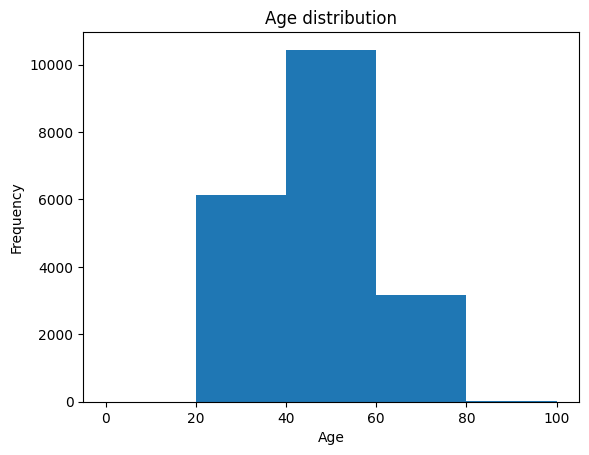

<Figure size 1200x800 with 0 Axes>

In [42]:
plt.hist(df['age'],  bins=[0,20,40,60,80,100])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.figure(figsize = (12,8))

plt.show()

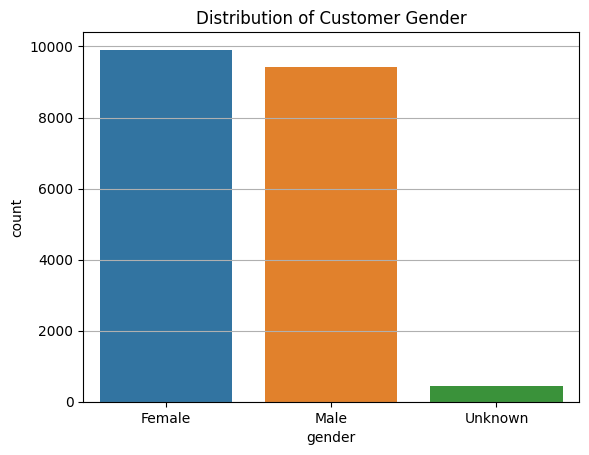

In [43]:
sns.countplot(x = 'gender', data = df)
plt.title('Distribution of Customer Gender')
plt.grid(axis='y')

plt.show()

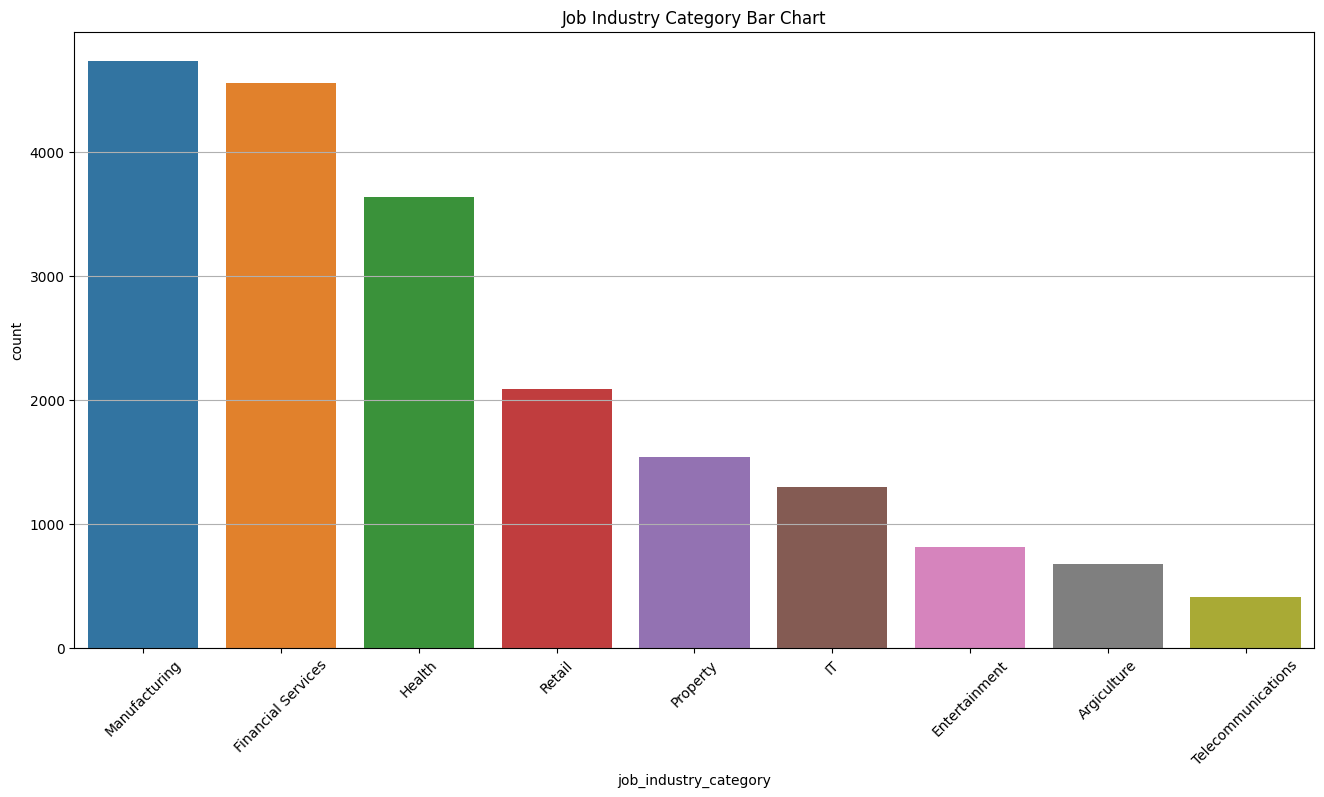

In [170]:

sorted_categories = df['job_industry_category'].value_counts().index

# Create the countplot with sorted categories
plt.figure(figsize=(16, 8))
sns.countplot(x='job_industry_category', data=df, order=sorted_categories)
plt.title('Job Industry Category Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

plt.show()


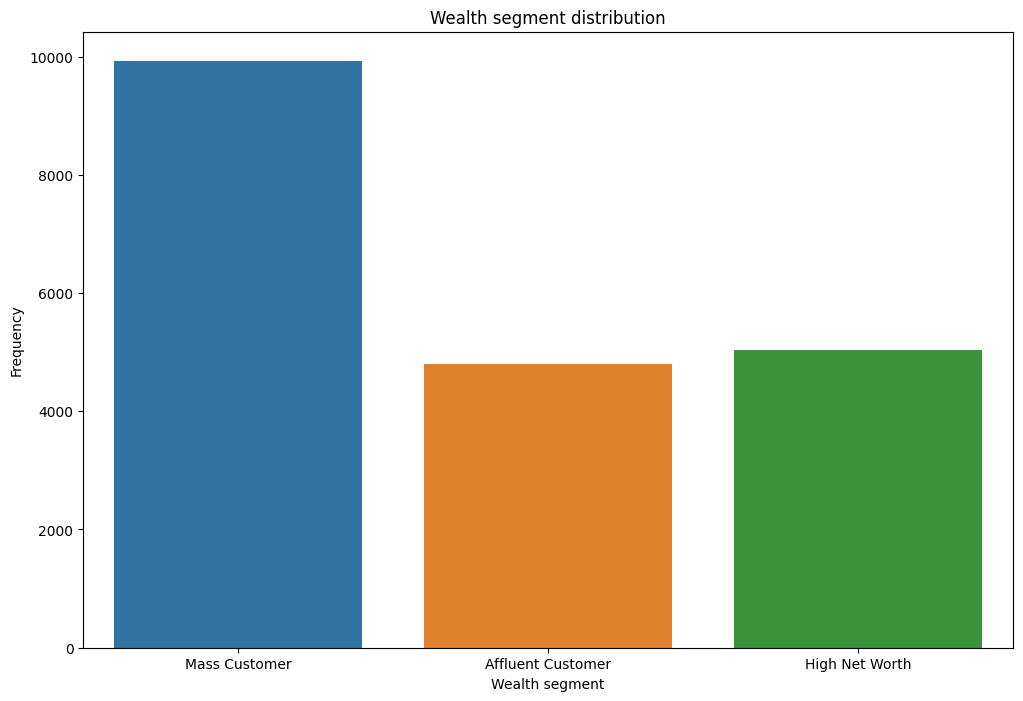

In [171]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')

plt.show()

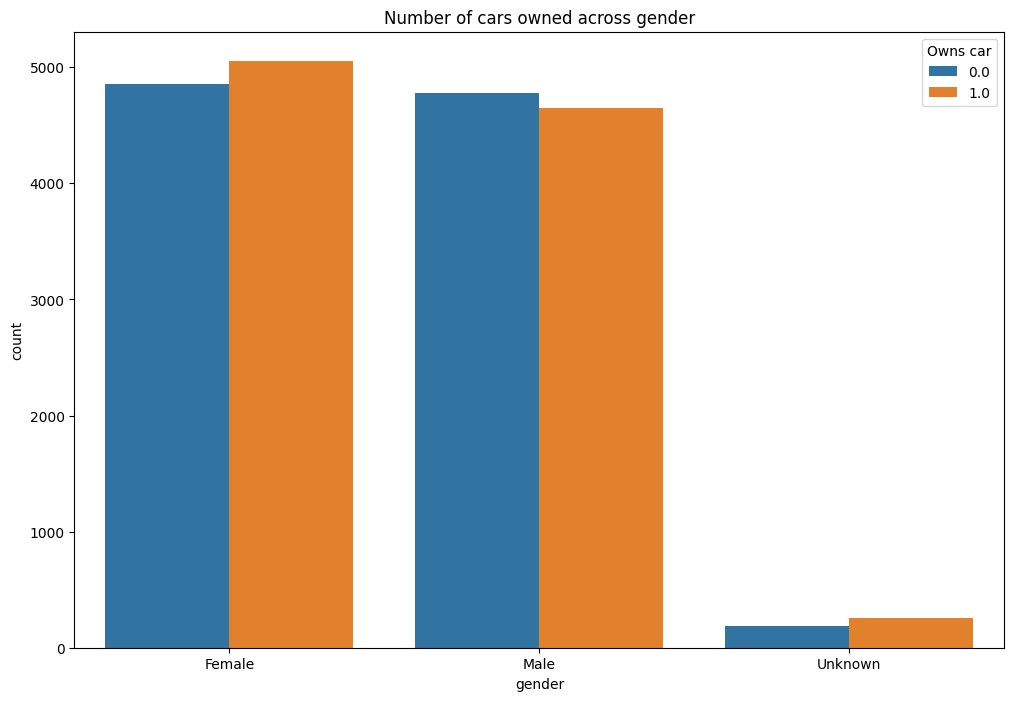

In [173]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right')
plt.title('Number of cars owned across gender')

plt.show()

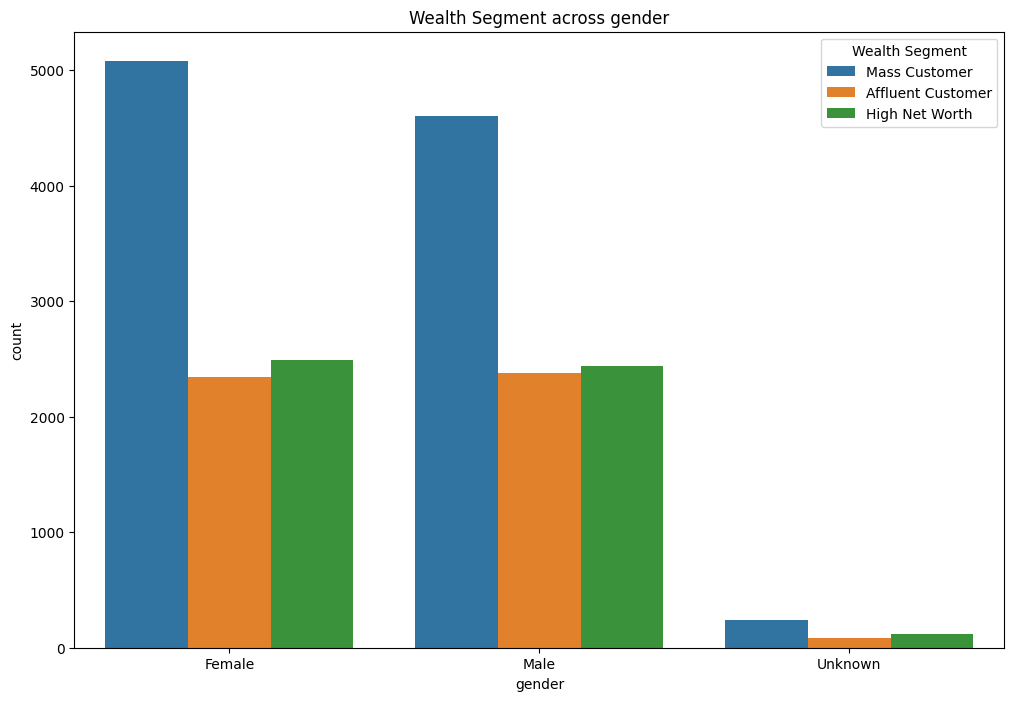

In [174]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')

plt.show()

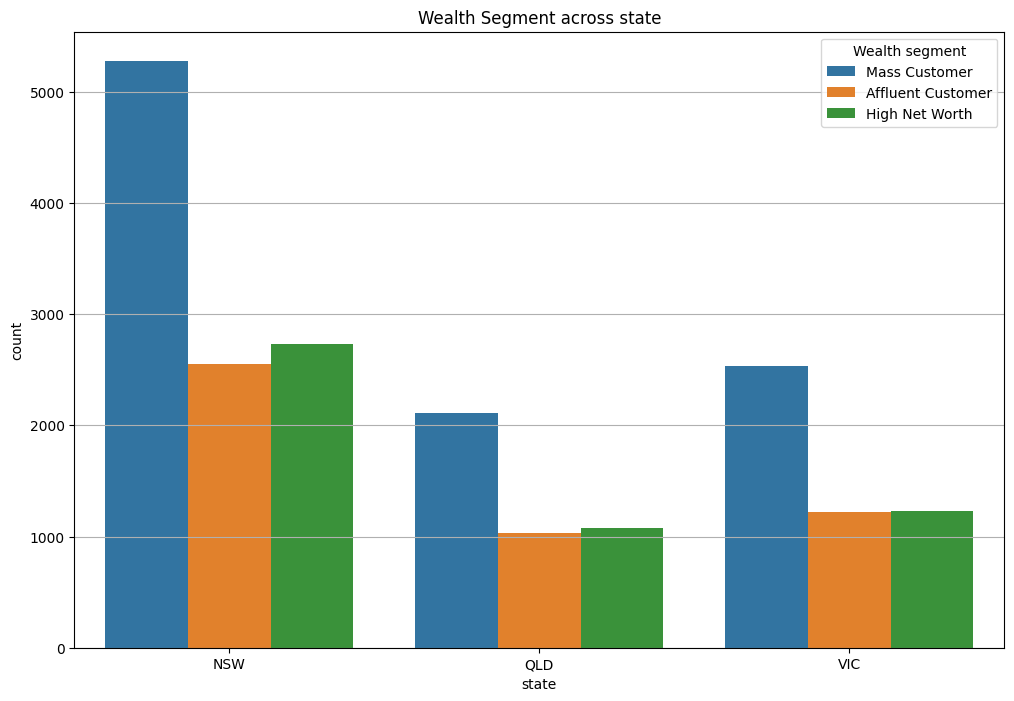

In [47]:
plt.figure(figsize = (12,8))
sns.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('Wealth Segment across state')
plt.grid(axis='y')

plt.show()

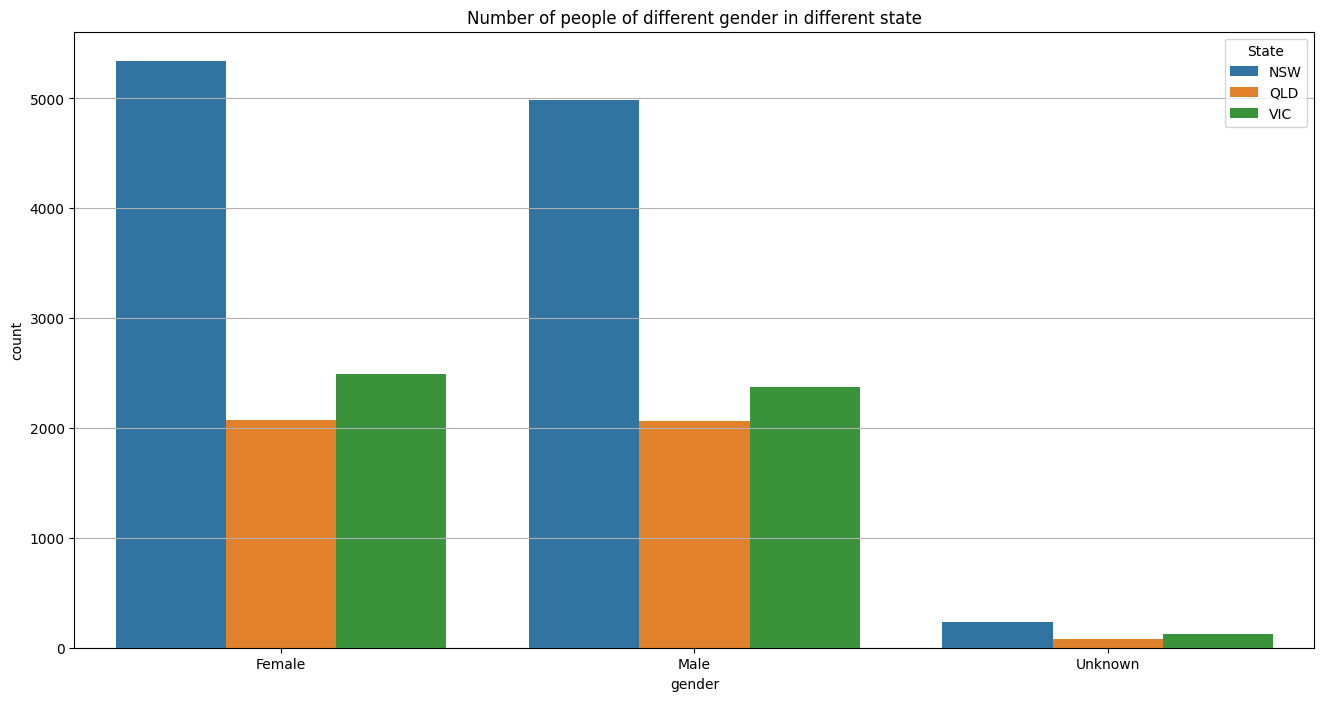

In [48]:
plt.figure(figsize = (16,8))
sns.countplot(x='gender', data=df, hue='state')
plt.legend(title='State', loc='upper right')
plt.title('Number of people of different gender in different state')
plt.grid(axis='y')

plt.show()

In [52]:
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit'],
      dtype='object')

In [55]:
# clients who bought more than 0 product
target = df[
            df['past_3_years_bike_related_purchases'] > 0]
target.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,...,0,1,Norco Bicycles,Mountain,low,small,688.63,612.88,33455,75.75
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,...,1,1,Trek Bicycles,Road,low,small,1720.70,1531.42,37823,189.28
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,...,1,1,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337,57.73
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,...,1,1,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378,509.97
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,...,0,1,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552,709.34


In [69]:
# average profit from different specialists
avg_purchase_by_job = df.groupby('job_title')['profit'].mean()
avg_purchase_by_job.sort_values().tail(10)

job_title
Human Resources Manager          692.240145
Media Manager III                692.274800
General Manager                  727.003867
Assistant Manager                754.659420
Marketing Manager                766.040227
Recruiting Manager               771.648135
Media Manager IV                 806.558704
Analog Circuit Design manager    814.259054
Project Manager                  826.399324
Information Systems Manager      864.129889
Name: profit, dtype: float64

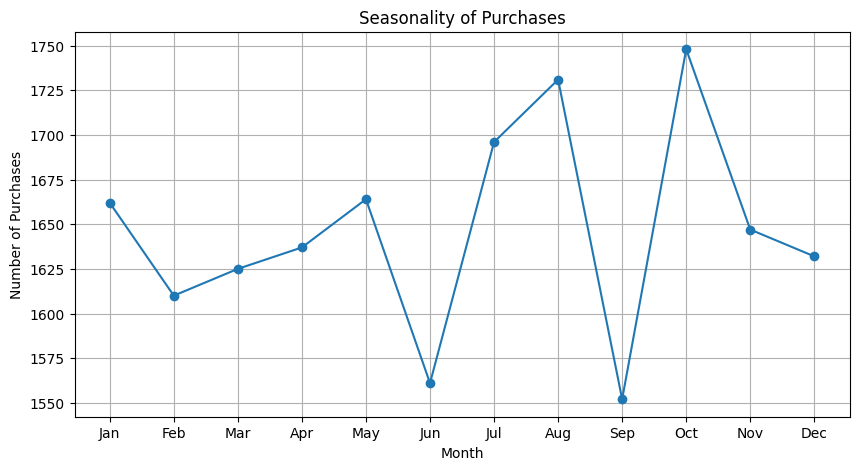

In [75]:
# seasons of purchases
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_month'] = df['transaction_date'].dt.month

monthly_purchase_count = df.groupby('transaction_month').size()

# Построение графика сезонности
plt.figure(figsize=(10, 5))
monthly_purchase_count.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Seasonality of Purchases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

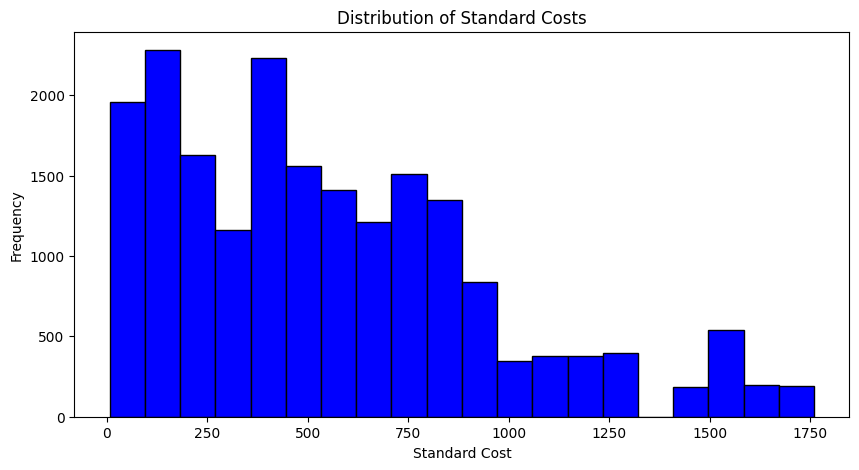

In [78]:
plt.figure(figsize=(10, 5))
plt.hist(df['standard_cost'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Standard Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Costs')
plt.show()

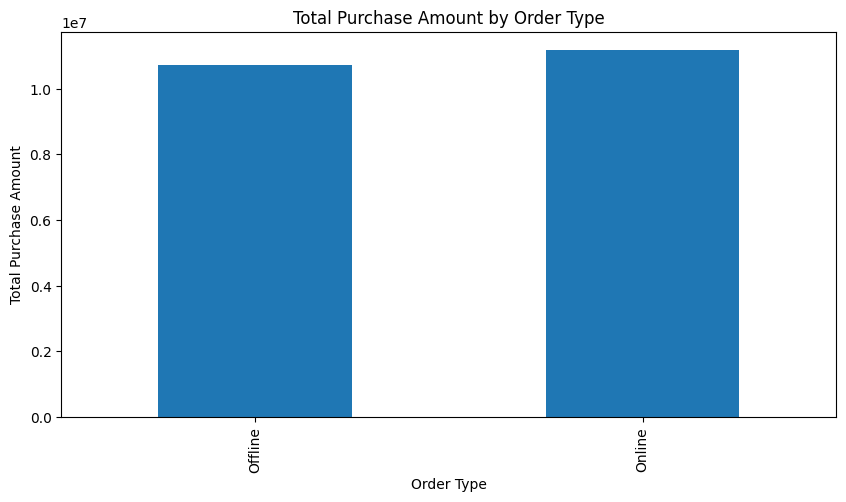

In [84]:
purchase_sum_by_order_type = df.groupby('online_order')['list_price'].sum()

plt.figure(figsize=(10, 5))
purchase_sum_by_order_type.plot(kind='bar')
plt.xlabel('Order Type')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Order Type')
plt.xticks([0, 1], ['Offline', 'Online'])
plt.show()

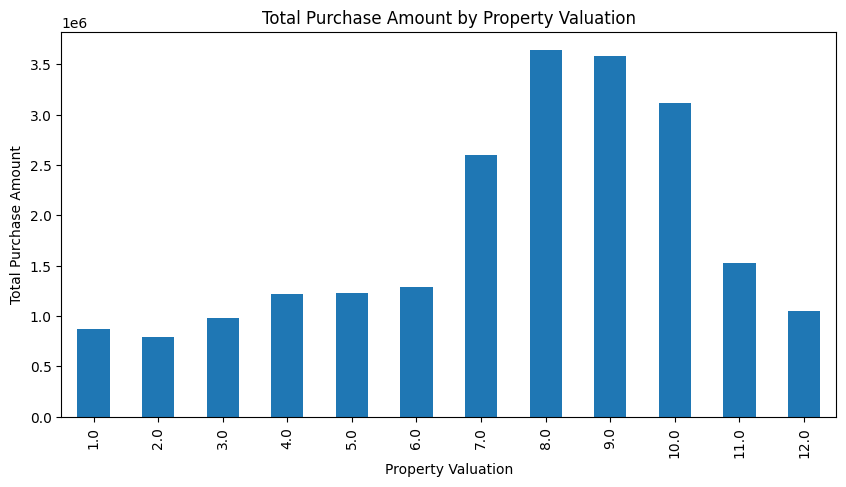

In [85]:
purchase_sum_by_property_valuation = df.groupby('property_valuation')['list_price'].sum()

plt.figure(figsize=(10, 5))
purchase_sum_by_property_valuation.plot(kind='bar')
plt.xlabel('Property Valuation')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Property Valuation')
plt.show()

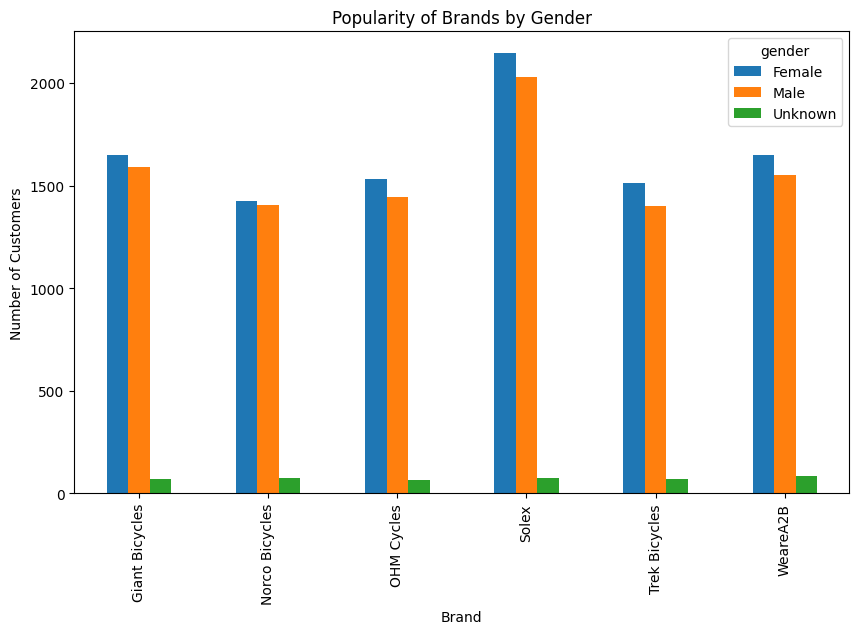

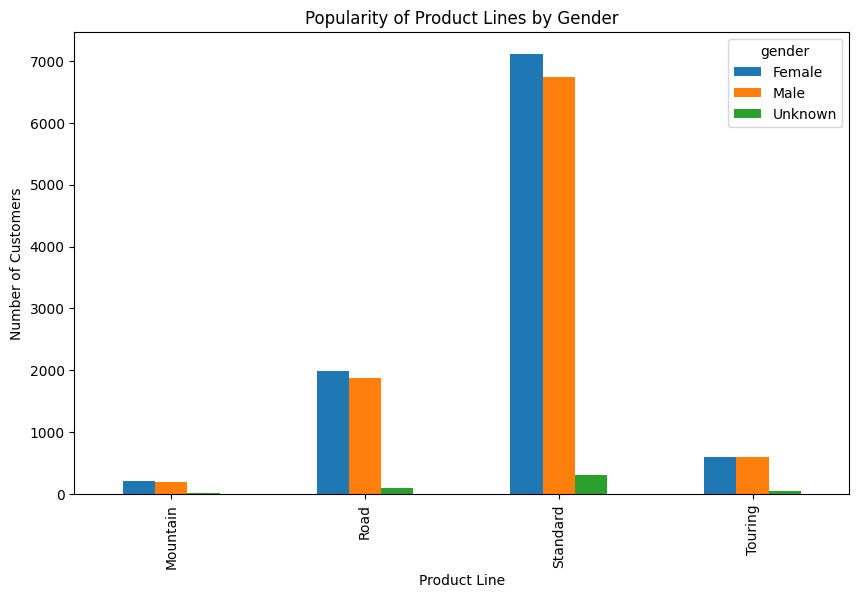

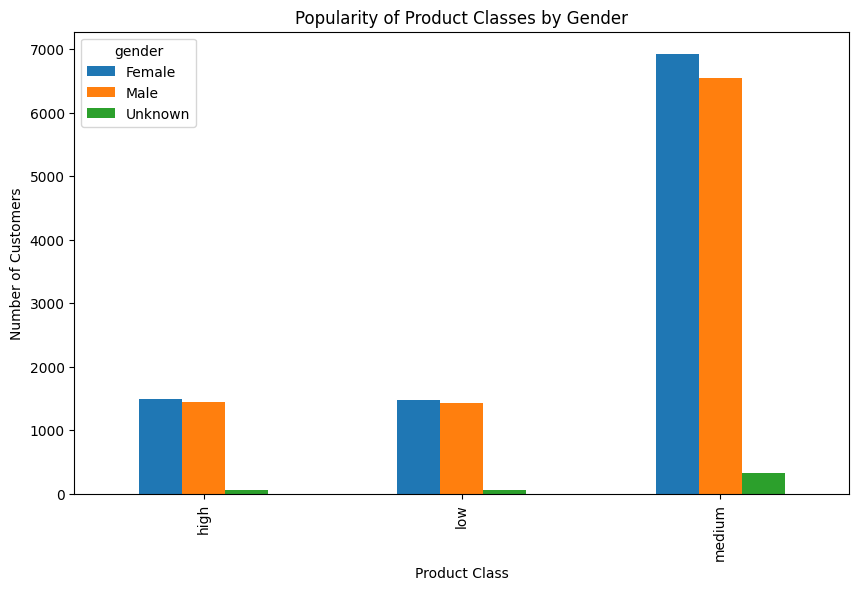

In [92]:
popular_brands = df.groupby(['brand', 'gender']).size().unstack()
popular_product_lines = df.groupby(['product_line', 'gender']).size().unstack()
popular_product_classes = df.groupby(['product_class', 'gender']).size().unstack()

popular_brands.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.title('Popularity of Brands by Gender')
plt.show()

popular_product_lines.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Line')
plt.ylabel('Number of Customers')
plt.title('Popularity of Product Lines by Gender')
plt.show()

popular_product_classes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Class')
plt.ylabel('Number of Customers')
plt.title('Popularity of Product Classes by Gender')
plt.show()


### NEW CLIENTS

In [146]:
target = pd.read_excel('EDA/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 2)
target.columns = target.iloc[0]
target = target.iloc[1:]

In [148]:
target.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125


In [149]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [151]:
target['past_3_years_bike_related_purchases'] = target['past_3_years_bike_related_purchases'].astype('int')
target['DOB'] = pd.to_datetime(target['DOB'])
target['tenure'] = target['tenure'].astype('int')
target['property_valuation'] = target['property_valuation'].astype('int')
target = target[['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
                 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address',
                 'postcode', 'state', 'country', 'property_valuation', 'Rank', 'Value']]

In [152]:
target.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [153]:
target.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [154]:
target['last_name'] = target.groupby('first_name').last_name.bfill().ffill()
target['job_title']= target['job_title'].fillna(method='bfill')
target['job_industry_category']= target['job_industry_category'].fillna(method='ffill')

In [158]:
target['DOB'] = pd.to_datetime(target['DOB'])
current_date = datetime.datetime.now()
target['age'] = (current_date - target['DOB']).apply(lambda x: x.days // 365)
mean_age = target['age'].mean()
target['age'].fillna(mean_age, inplace=True)
target['age'] = target['age'].astype('int')

In [159]:
target.describe()

,past_3_years_bike_related_purchases,DOB,tenure,property_valuation,age
count,1000.000000,983,1000.000000,1000.000000,1000.000000
mean,49.836000,1971-04-20 14:05:14.954221768,11.388000,7.397000,51.824000
min,0.000000,1938-06-08 00:00:00,0.000000,1.000000,21.000000
25%,26.750000,1957-10-09 00:00:00,7.000000,6.000000,40.000000
50%,51.000000,1972-03-24 00:00:00,11.000000,8.000000,51.000000
75%,72.000000,1983-04-12 12:00:00,15.000000,9.000000,65.000000
max,99.000000,2002-02-27 00:00:00,22.000000,12.000000,85.000000
std,27.796686,NaN,5.037145,2.758804,16.942966


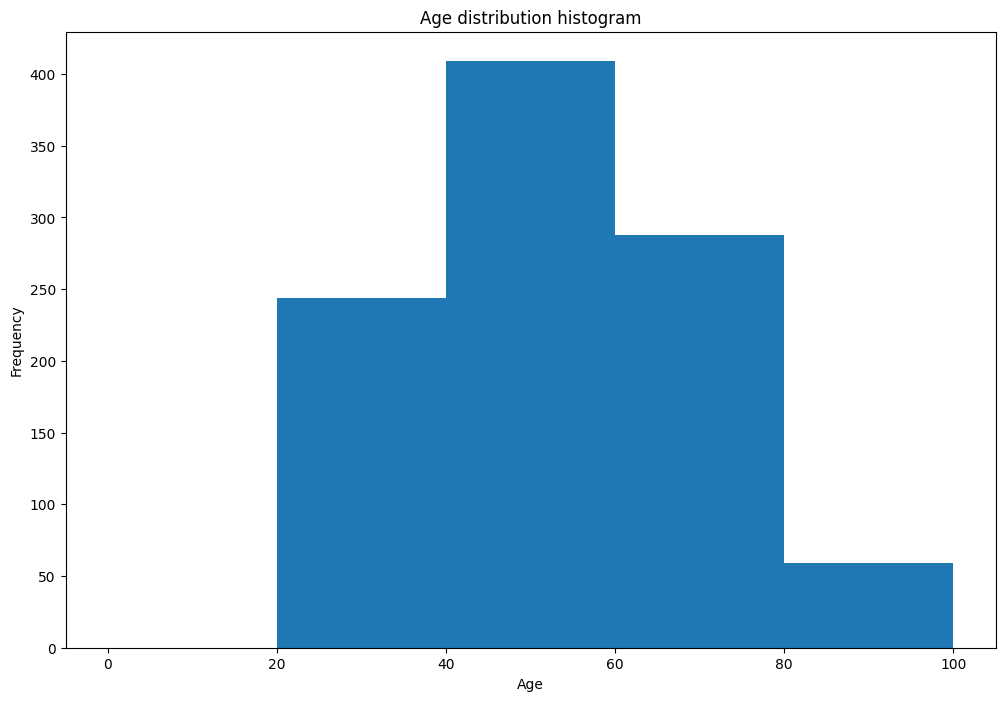

In [160]:
plt.figure(figsize = (12,8))
plt.hist(target['age'], bins=[0,20,40,60,80,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

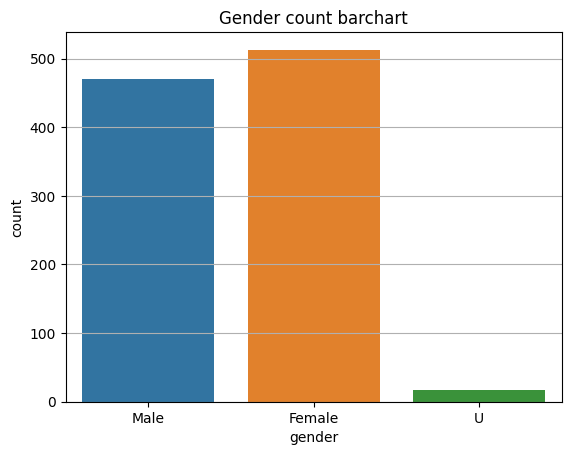

In [167]:
sns.countplot(x = 'gender', data = target)
plt.title('Gender count barchart')
plt.grid(axis='y')
plt.show()

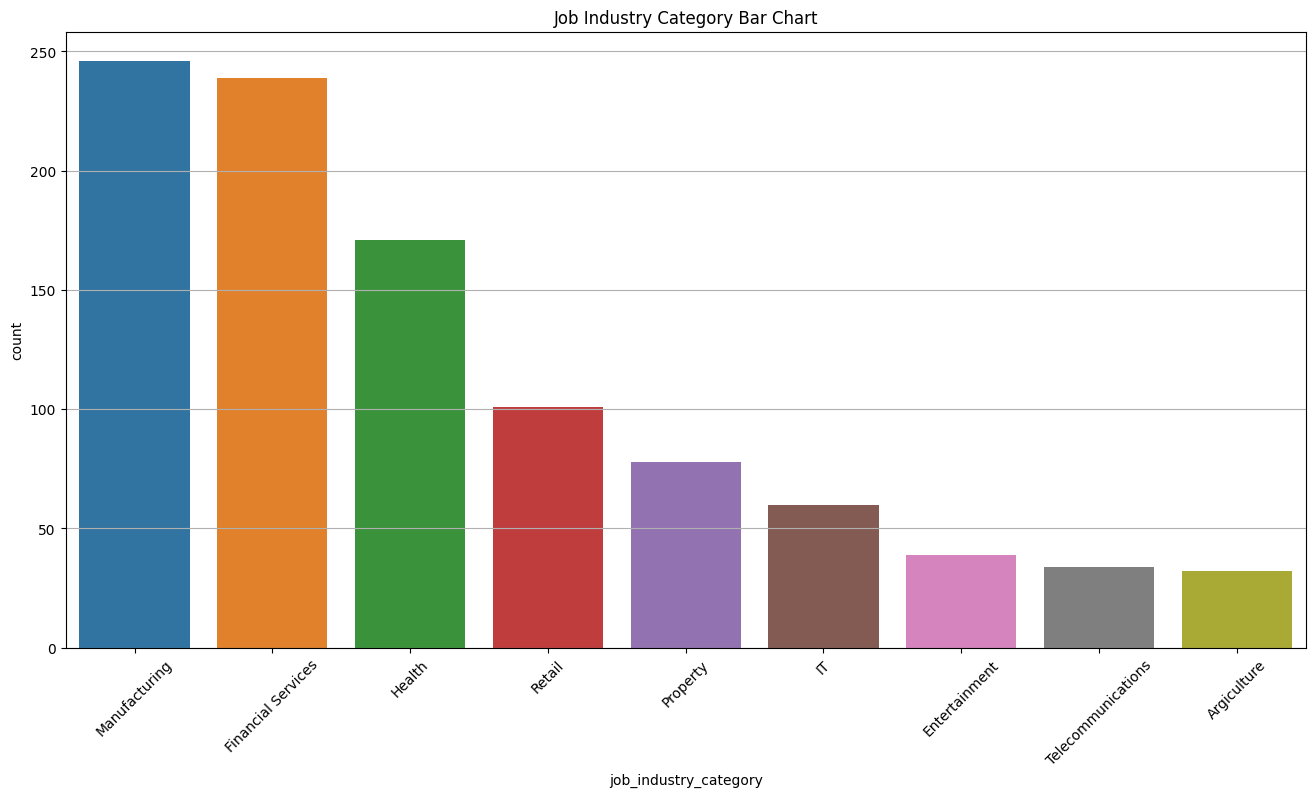

In [169]:

sorted_categories = target['job_industry_category'].value_counts().index

# Create the countplot with sorted categories
plt.figure(figsize=(16, 8))
sns.countplot(x='job_industry_category', data=target, order=sorted_categories)
plt.title('Job Industry Category Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

plt.show()


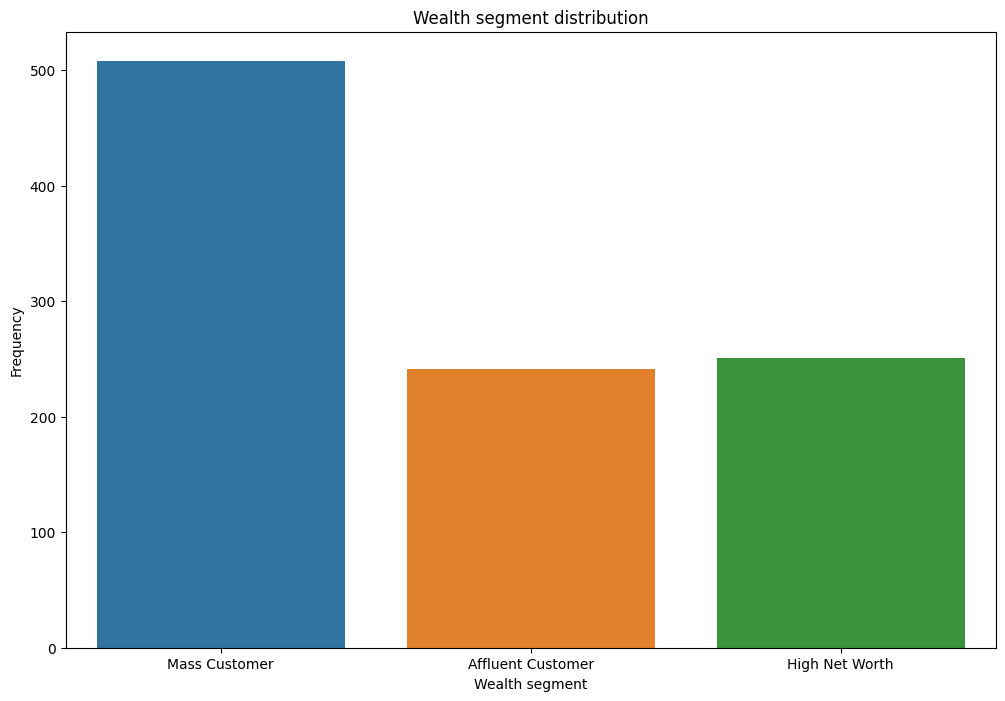

In [165]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'wealth_segment', data = target)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_new.png')
plt.show()

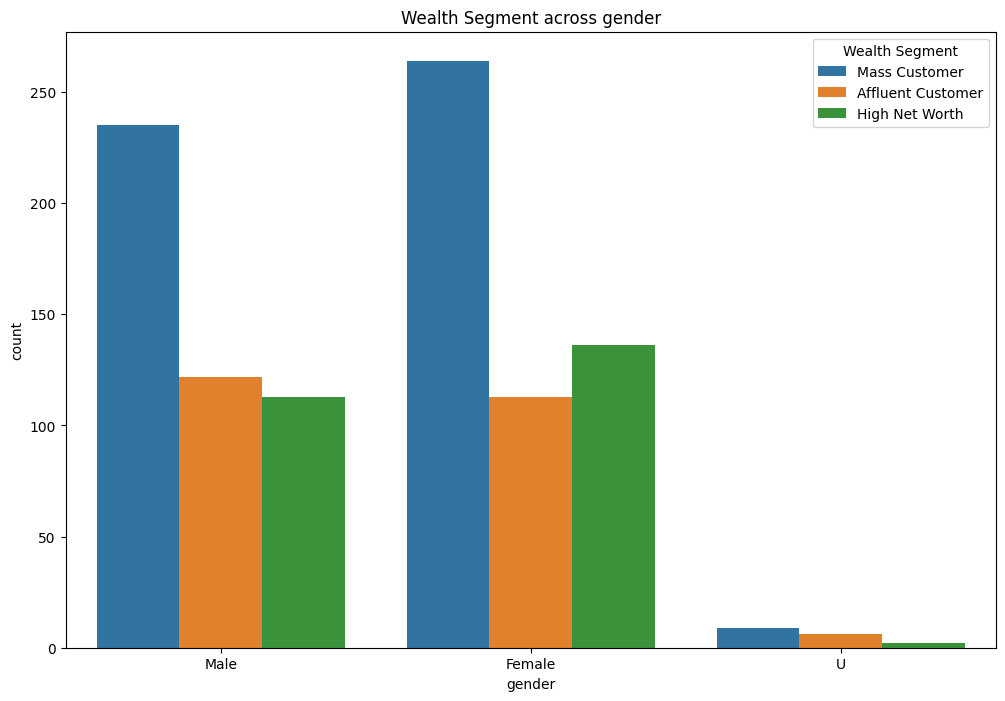

In [172]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=target, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')

plt.show()

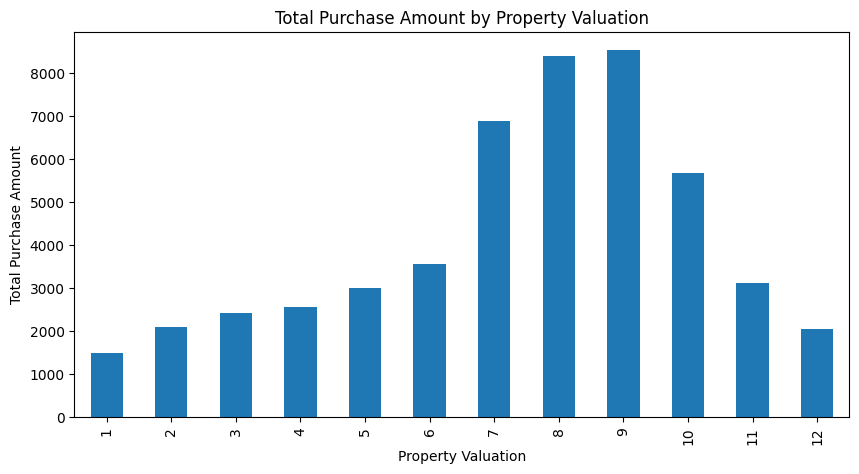

In [166]:
purchase_sum_by_property_valuation = target.groupby('property_valuation')['past_3_years_bike_related_purchases'].sum()

plt.figure(figsize=(10, 5))
purchase_sum_by_property_valuation.plot(kind='bar')
plt.xlabel('Property Valuation')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Property Valuation')
plt.show()